In [5]:
def user_points(prompt):    
    try:
        user_points = (input(prompt))
        user_points = [float(i) for i in user_points.split()]
        for user in user_points:
            if user < 0: 
                    raise ValueError("value must be greater than 0")
    except ValueError as err:
        print(err)
    return user_points
user_points("Input your coordinates")

[23.0, 32.0]

In [6]:
def storage_function(height, width):
    dimension = {
        "height": height,
        "width": width
    }
    return dimension

In [121]:
import re
import numpy as np

def sort_points_to_documents():
    with open("../Data/datapoints.txt", "r") as f_points:
        points = [point.strip("\n") for point in f_points.readlines()]

    points.pop(0)

    datapoints = [data.split(",") for data in points]
    pichu_list = []
    pika_list = []

    for datapoint in datapoints:
        datapoint = [i.strip() for i in datapoint]
        if datapoint[2] == "1":
            pichu_list.append(datapoint)
        if datapoint[2] == "0":
            pika_list.append(datapoint)

    with open("../Data/pichu.txt", "w") as f_pichu:
        for item in pichu_list:
            f_pichu.write(f"{item}\n")
    with open("../Data/pikachu.txt", "w") as f_pika:
        for item in pika_list:
            f_pika.write(f"{item}\n")


sort_points_to_documents()

Distance to closest pikachu point: 11.40175425099138 cm
Distance to closest pikachu point: 11.536463929644993 cm
Distance to closest pikachu point: 14.866068747318506 cm
[11.40175425099138, 11.536463929644993, 14.866068747318506]
Distance to closest pichu point: 15.913830462839549 cm
Your entry is a Pikachu
Your entry is a Pikachu
Your entry is a Pikachu


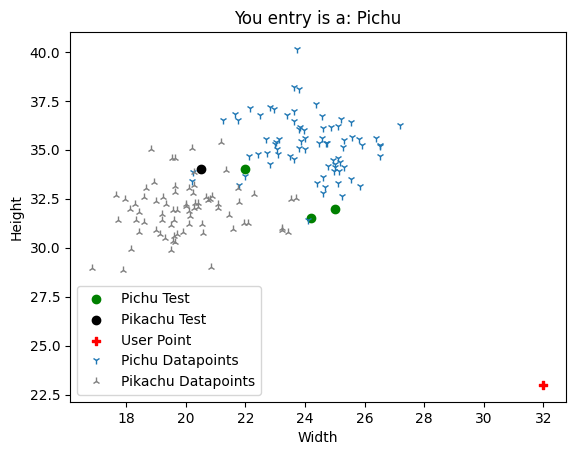

In [159]:
from cProfile import label
from cgitb import text
from turtle import color, width
import matplotlib.pyplot as plt
import numpy as np
import ast
import math

def test_pichu_or_pikachu():
    smaple1 = [25, 32]
    sample2 = [24.2, 31, 5]

    pikachu_sample_list = [[25, 32], [24.2, 31.5], [22, 34]]
    pichu_sample_list = [20.5, 34]

    pichu_height_list = []
    pichu_width_list = []
    pikachu_height_list = []
    pikachu_width_list = []

    result = ""


    with open("../Data/pichu.txt", "r") as f_pichu_list:
        pichu_data_list = [ast.literal_eval(pichu) for pichu in f_pichu_list.readlines()]
       
    for item in pichu_data_list:
        pichu_height_list.append(float(item[0]))
        pichu_width_list.append(float(item[1]))

    with open("../Data/pikachu.txt", "r") as f_pikachu_list:
        pikachu_data_list = [ast.literal_eval(pika) for pika in f_pikachu_list.readlines()]

    for item in pikachu_data_list:
        pikachu_height_list.append(float(item[0]))
        pikachu_width_list.append(float(item[1]))

    user_points_ = user_points("Input your coordinates")

    user_ = np.array([user_points_])
  


    #√[(x₂ - x₁)² + (y₂ - y₁)²]
    distance_pikachu = 0
    distance_pichu = 0
    pika_point_distance_list = []

    list_points = {}
    for item in pikachu_sample_list:
        distance_pikachu = math.sqrt(((user_points_[0]) - float(item[0]))**2 + (user_points_[1] - item[1])**2)
        pika_point_distance_list.append(distance_pikachu)
        print(f"Distance to closest pikachu point: {distance_pikachu} cm")
    print(pika_point_distance_list)
    distance_pichu = math.sqrt((user_points_[0] - pichu_sample_list[0])**2 + (user_points_[1] - pichu_sample_list[1])**2)
    print(f"Distance to closest pichu point: {distance_pichu} cm")

    distance_pichu_points = 0
    distance_pika_points = 0
        

    for item in pika_point_distance_list:
        if distance_pichu < item:
            print("Your entry is a Pichu")
            result = "Pichu"
            break
        else:
            print("Your entry is a Pikachu")
            result = "Pichu"

    data_pika = np.array([pikachu_sample_list])
    x, y = data_pika.T
    plt.scatter(x, y, color="green")

    data_pichu = np.array([pichu_sample_list])
    x, y = data_pichu.T
    plt.scatter(x, y, color="black")

    x, y = user_.T
    plt.scatter(x,y,color="red", marker="P")
    
    plt.plot(pichu_height_list, pichu_width_list, "1")
    plt.plot(pikachu_height_list, pikachu_width_list, "2", color="gray")
    plt.title(f"You entry is a: {result}")
    plt.xlabel("Width")
    plt.ylabel("Height")   
    plt.legend(["Pichu Test", "Pikachu Test", "User Point", "Pichu Datapoints", "Pikachu Datapoints"])   
    

    


test_pichu_or_pikachu()

In [186]:
from operator import itemgetter

with open("../Data/datapoints.txt", "r") as f_data:
    points = [point.strip("\n") for point in f_data.readlines()]
    points.pop(0)
    points = [data.split(",") for data in points]

user_points_ = user_points("Input your coordinates")
distance_points_list = []
pichu_votes = 0
pikachu_votes = 0
for item in points:
    distance = math.sqrt(((user_points_[0]) - float(item[0]))**2 + ((user_points_[1]) - float(item[1]))**2)
    distance_points_list.append([distance, item[2]])

distance_points_list = sorted(distance_points_list, key=itemgetter(0))
distance_points_list = distance_points_list[:10]

for item in distance_points_list:
    if float(item[1]) == 1:
        pikachu_votes += 1
    else:
        pichu_votes += 1

print(distance_points_list)
print(pichu_votes)
print(pikachu_votes)



[[12.242565903634066, ' 1'], [12.347375719508651, ' 0'], [12.37963615594052, ' 1'], [12.437294120506634, ' 1'], [12.567990079748046, ' 0'], [12.624980405806502, ' 0'], [12.896377215373652, ' 1'], [12.897113470518883, ' 1'], [12.979193256819244, ' 1'], [13.08504930891395, ' 1']]
3
7
